> **Jupyter slideshow:** This notebook can be displayed as slides. To view it as a slideshow in your browser, run the following cell:

> `> jupyter nbconvert [this_notebook.ipynb] --to slides --post serve`
 
> To toggle off the slideshow cell formatting, click the `CellToolbar` button, then `View > Cell Toolbar > None`.

<img src="../images/shell-logo.png" width="50" height="50" align="right"/>

<img src="../images/di.png" width="50" height="50" align="right"/>

# Feature Engineering in Time Series

In [13]:
# ! jupyter nbconvert Python_intro.ipynb --to slides --post serve

## Learning Objectives
*In this lesson, we will go over the following:*

- Introduction to Feature Engineering in Time Series
- Extracting Data & Time based Features
- Extracting Lag feature, sliding window and expanding window


In [14]:
#changing dtype
import pandas as pd
data = pd.read_csv('../data/Train_SU63ISt.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')
data.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [15]:
#time feature
import pandas as pd
data = pd.read_csv('../data/Train_SU63ISt.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')

data['Hour'] = data['Datetime'].dt.hour 
data['minute'] = data['Datetime'].dt.minute 

data.head()

,ID,Datetime,Count,Hour,minute
0,0,2012-08-25 00:00:00,8,0,0
1,1,2012-08-25 01:00:00,2,1,0
2,2,2012-08-25 02:00:00,6,2,0
3,3,2012-08-25 03:00:00,2,3,0
4,4,2012-08-25 04:00:00,2,4,0


In [9]:
#date feature
import pandas as pd
data = pd.read_csv('../data/Train_SU63ISt.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M', errors = "coerce")

data['year']=data['Datetime'].dt.year 
data['month']=data['Datetime'].dt.month 
data['day']=data['Datetime'].dt.day

data['dayofweek_num']=data['Datetime'].dt.dayofweek  
data['dayofweek_name']=data['Datetime'].dt.day_name()

data.head()

,ID,Datetime,Count,year,month,day,dayofweek_num,dayofweek_name
0,0,2012-08-25 00:00:00,8,2012,8,25,5,Saturday
1,1,2012-08-25 01:00:00,2,2012,8,25,5,Saturday
2,2,2012-08-25 02:00:00,6,2012,8,25,5,Saturday
3,3,2012-08-25 03:00:00,2,2012,8,25,5,Saturday
4,4,2012-08-25 04:00:00,2,2012,8,25,5,Saturday


In [27]:
#expanding windows
import pandas as pd
data = pd.read_csv('../data/Train_SU63ISt.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')

data['expanding_mean'] = data['Count'].expanding(2).mean()
data['roll_mean'] = data.Count.rolling(2).mean()
data = data[['Datetime','Count', 'expanding_mean','roll_mean']]
data.head(10)

,Datetime,Count,expanding_mean,roll_mean
0,2012-08-25 00:00:00,8,NaN,NaN
1,2012-08-25 01:00:00,2,5.000000,5.0
2,2012-08-25 02:00:00,6,5.333333,4.0
3,2012-08-25 03:00:00,2,4.500000,4.0
4,2012-08-25 04:00:00,2,4.000000,2.0
5,2012-08-25 05:00:00,2,3.666667,2.0
6,2012-08-25 06:00:00,2,3.428571,2.0
7,2012-08-25 07:00:00,2,3.250000,2.0
8,2012-08-25 08:00:00,6,3.555556,4.0
9,2012-08-25 09:00:00,2,3.400000,4.0


In [17]:
import plotly.express as px

In [19]:
data.shape

(18288, 3)

In [28]:
px.line( data[:1000], 
       x = "Datetime",
       y = ['Count','expanding_mean','roll_mean'])

In [29]:
#lag feature
import pandas as pd
data = pd.read_csv('../data/Train_SU63ISt.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')

data['lag_1'] = data['Count'].shift(1)
data = data[['Datetime', 'lag_1', 'Count']]
data.head()

,Datetime,lag_1,Count
0,2012-08-25 00:00:00,NaN,8
1,2012-08-25 01:00:00,8.0,2
2,2012-08-25 02:00:00,2.0,6
3,2012-08-25 03:00:00,6.0,2
4,2012-08-25 04:00:00,2.0,2


In [12]:
#lag seven

import pandas as pd
data = pd.read_csv('../data/Train_SU63ISt.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')

data['lag_1'] = data['Count'].shift(1)
data['lag_2'] = data['Count'].shift(2)
data['lag_3'] = data['Count'].shift(3)
data['lag_4'] = data['Count'].shift(4)
data['lag_5'] = data['Count'].shift(5)
data['lag_6'] = data['Count'].shift(6)
data['lag_7'] = data['Count'].shift(7)

data = data[['Datetime', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'Count']]
data.head(10)

,Datetime,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,Count
0,2012-08-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,2012-08-25 01:00:00,8.0,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2012-08-25 02:00:00,2.0,8.0,NaN,NaN,NaN,NaN,NaN,6
3,2012-08-25 03:00:00,6.0,2.0,8.0,NaN,NaN,NaN,NaN,2
4,2012-08-25 04:00:00,2.0,6.0,2.0,8.0,NaN,NaN,NaN,2
5,2012-08-25 05:00:00,2.0,2.0,6.0,2.0,8.0,NaN,NaN,2
6,2012-08-25 06:00:00,2.0,2.0,2.0,6.0,2.0,8.0,NaN,2
7,2012-08-25 07:00:00,2.0,2.0,2.0,2.0,6.0,2.0,8.0,2
8,2012-08-25 08:00:00,2.0,2.0,2.0,2.0,2.0,6.0,2.0,6
9,2012-08-25 09:00:00,6.0,2.0,2.0,2.0,2.0,2.0,6.0,2


### Exercise

In [44]:
import pandas as pd
data = pd.read_csv('../data/Train_SU63ISt.csv', parse_dates=['Datetime'], index_col='Datetime', usecols=['Datetime','Count'])
# data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')

data.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [49]:
# 

In [50]:
#find out daily count/ resample this to daily count
data.resample('1d').sum()

,Count
Datetime,
2012-01-09,112
2012-01-10,248
2012-01-11,304
2012-01-12,210
2012-01-13,0
...,...
2014-12-05,6826
2014-12-06,7540
2014-12-07,5858


In [53]:
# extract day of the week in a separate columns
data['dayOfWeek'] = data.index.day_name()

In [65]:
# data[ (data.index > "2012-8-25") & (data.index < "2012-8-26")]

In [70]:
import numpy as np
# group by day of the week and resample daily count and find patterns
daily_df = data.resample('1d').agg( {"Count" : "sum" , "dayOfWeek" : 'first' }  )

<AxesSubplot:xlabel='dayOfWeek'>

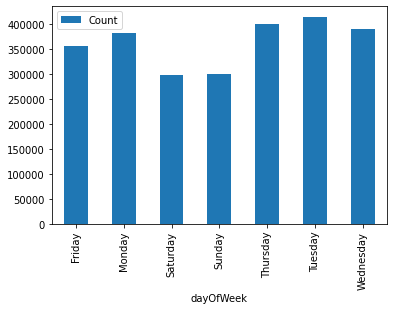

In [73]:
# Which day of the week has the max Count
daily_df.groupby('dayOfWeek').sum().plot.bar()

In [82]:
daily_df = daily_df.dropna()

In [118]:
w = 15
daily_df['weeklyRollingMedian'] = daily_df.Count.rolling(window = w ).median()
daily_df['weeklyRollingq25'] = daily_df.Count.rolling(window = w ).quantile(0.25)
daily_df['weeklyRollingq75'] = daily_df.Count.rolling(window = w ).quantile(0.75)

C:\Users\pele1\AppData\Local\Temp/ipykernel_18232/2938618277.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pele1\AppData\Local\Temp/ipykernel_18232/2938618277.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pele1\AppData\Local\Temp/ipykernel_18232/2938618277.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [119]:
daily_df['upper'] = daily_df['weeklyRollingq75'] + 1.5*(daily_df['weeklyRollingq75'] - daily_df['weeklyRollingq25'])
daily_df['lower'] = daily_df['weeklyRollingq25'] - 1.5*(daily_df['weeklyRollingq75'] - daily_df['weeklyRollingq25'])

C:\Users\pele1\AppData\Local\Temp/ipykernel_18232/1385137574.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pele1\AppData\Local\Temp/ipykernel_18232/1385137574.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [120]:
# daily_df.head(10)

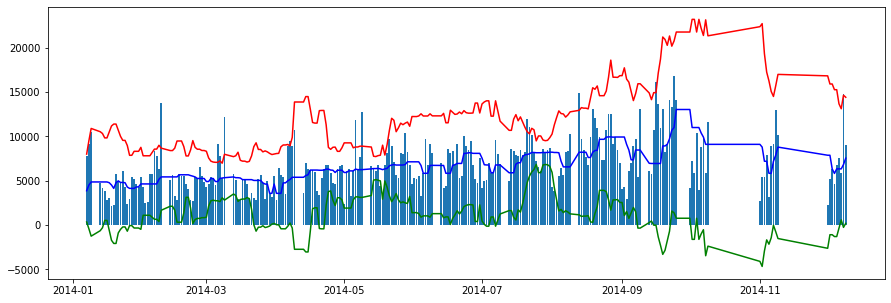

In [121]:
f,ax = plt.subplots(1,1, figsize = (15,5))

ax.plot(daily_df.iloc[500:].weeklyRollingMedian, c = 'b');
ax.plot(daily_df.iloc[500:].upper, c = 'r');
ax.plot(daily_df.iloc[500:].lower, c = 'g');
ax.bar(daily_df.index[500:],daily_df.Count[500:]);

plt.show()

In [101]:
daily_df

,Count,dayOfWeek,weeklyRollingMedian
Datetime,,,
2012-01-09,112,Monday,NaN
2012-01-10,248,Tuesday,NaN
2012-01-11,304,Wednesday,NaN
2012-01-12,210,Thursday,NaN
2012-02-09,118,Thursday,NaN
...,...,...,...
2014-12-05,6826,Friday,6336.0
2014-12-06,7540,Saturday,6336.0
2014-12-07,5858,Sunday,5858.0


In [83]:
px.bar(daily_df.reset_index(),
      x = 'Datetime',
      y = 'Count',
       color = 'dayOfWeek'
      )